### Ames Housing Data Set

**Overview**

Examined a housing dataset from Ames, USA. This project was part of a kaggle competition involving data scientists from all over the world. The aim here was to come up with a model that allows us to predict house prices using the data set at our disposal. Without the ability to model, one might not get their returns on investment whenever they choose to sell their houses or, by the same token, others might want to buy the best house subject to their budget constraints.

Therefore, I fitted several linear regression models, including regularized models in order to determine whether or not these models would be able to predict house prices especially on an unseen data set. The performance metric used to gauge the model accuracy is the R2.

**Limitations**

The model may however have some problems as it was based on data on houses sold between 2006 - 2010 and it represents a very small time frame and only from the city of Ames. This dataset is limited in scope both in terms of the time frame captured, as well as location. House prices could be a little challenging to predict as it is also affected by a wide variety of factors such as how the economy is performing, expectations of individuals of what they deem the house price should be, or other possible variables that were excluded in the data set. Thus, this model serves with limited scope and it is, without a doubt, still useful to some degree.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import scipy.stats as stats

%matplotlib inline
pd.pandas.set_option('display.max_columns',None)




sns.set_style('ticks')


In [2]:
## import training data set
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv')

In [3]:
## column names: lower case and remove spaces

train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ','')

train.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

In [4]:
## column names: lower case and remove spaces
test.columns = test.columns.str.lower()
test.columns = test.columns.str.replace(' ','')

test.columns

Index(['id', 'pid', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea',
       'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremod/add', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'pa

In [5]:
train.head()

,id,pid,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremod/add,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
id               2051 non-null int64
pid              2051 non-null int64
mssubclass       2051 non-null int64
mszoning         2051 non-null object
lotfrontage      1721 non-null float64
lotarea          2051 non-null int64
street           2051 non-null object
alley            140 non-null object
lotshape         2051 non-null object
landcontour      2051 non-null object
utilities        2051 non-null object
lotconfig        2051 non-null object
landslope        2051 non-null object
neighborhood     2051 non-null object
condition1       2051 non-null object
condition2       2051 non-null object
bldgtype         2051 non-null object
housestyle       2051 non-null object
overallqual      2051 non-null int64
overallcond      2051 non-null int64
yearbuilt        2051 non-null int64
yearremod/add    2051 non-null int64
roofstyle        2051 non-null object
roofmatl         2051 non-n

In [7]:
train.shape

(2051, 81)

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
id               879 non-null int64
pid              879 non-null int64
mssubclass       879 non-null int64
mszoning         879 non-null object
lotfrontage      719 non-null float64
lotarea          879 non-null int64
street           879 non-null object
alley            58 non-null object
lotshape         879 non-null object
landcontour      879 non-null object
utilities        879 non-null object
lotconfig        879 non-null object
landslope        879 non-null object
neighborhood     879 non-null object
condition1       879 non-null object
condition2       879 non-null object
bldgtype         879 non-null object
housestyle       879 non-null object
overallqual      879 non-null int64
overallcond      879 non-null int64
yearbuilt        879 non-null int64
yearremod/add    879 non-null int64
roofstyle        879 non-null object
roofmatl         879 non-null object
exterior1st    

In [9]:
test.shape

(879, 80)

There are lots of missing values. Data might not be of the right data type. Break down data into different types in order to handle them better later. Everything was cross-checked with data dictionary.

## Explolatory Data Analysis

### Numerical Data

In [10]:
## columns with numerical data
numerical_columns = train._get_numeric_data().columns

# number of numerical columns
print('Number of columns with numerical data: ', len(numerical_columns))

# visualize data frame
train[numerical_columns].head()

Number of columns with numerical data:  39


,id,pid,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremod/add,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


#### Datetime variables

We have 4 datetime variables in the data set -  'yearbuilt', 'yearremod/add', 'garageyrblt', 'yrsold'

In [11]:
year_columns = [columns for columns in numerical_columns if 'yr' in columns or 'year' in columns]
year_columns

['yearbuilt', 'yearremod/add', 'garageyrblt', 'yrsold']

#### Discrete variables

In [12]:
discrete_columns = [columns for columns in numerical_columns if len(train[columns].unique())<25
                    and columns not in year_columns+['id']]
print('Discrete Variables Count: {}'.format(len(discrete_columns)))


Discrete Variables Count: 15


In [13]:
discrete_columns

['mssubclass',
 'overallqual',
 'overallcond',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garagecars',
 '3ssnporch',
 'poolarea',
 'mosold']

In [14]:
train[discrete_columns].head()

,mssubclass,overallqual,overallcond,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,3ssnporch,poolarea,mosold
0,60,6,8,0.0,0.0,2,1,3,1,6,0,2.0,0,0,3
1,60,7,5,1.0,0.0,2,1,4,1,8,1,2.0,0,0,4
2,20,5,7,1.0,0.0,1,0,3,1,5,0,1.0,0,0,1
3,60,5,5,0.0,0.0,2,1,3,1,7,0,2.0,0,0,4
4,50,6,8,0.0,0.0,2,0,3,1,6,0,2.0,0,0,3


#### Continuous variables

In [15]:
continuous_columns = [columns for columns in numerical_columns if columns not in discrete_columns+year_columns+['id']]
print('Continuous Variables Count: {}'.format(len(continuous_columns)))

Continuous Variables Count: 19


In [16]:
continuous_columns

['pid',
 'lotfrontage',
 'lotarea',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 '1stflrsf',
 '2ndflrsf',
 'lowqualfinsf',
 'grlivarea',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'screenporch',
 'miscval',
 'saleprice']

### Categorical data

In [17]:
categorical_columns = [columns for columns in train.columns if columns not in numerical_columns]

# number of categorical columns
print('Number of columns with categorical data: ', len(categorical_columns))

# visualize data frame
train[categorical_columns].head()

Number of columns with categorical data:  42


,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype
0,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
1,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD
2,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD
3,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD


In [18]:
for columns in categorical_columns:
    print('The column is {} and the number of categories it has is: {}'.format(columns, len(train[columns].unique())))

The column is mszoning and the number of categories it has is: 7
The column is street and the number of categories it has is: 2
The column is alley and the number of categories it has is: 3
The column is lotshape and the number of categories it has is: 4
The column is landcontour and the number of categories it has is: 4
The column is utilities and the number of categories it has is: 3
The column is lotconfig and the number of categories it has is: 5
The column is landslope and the number of categories it has is: 3
The column is neighborhood and the number of categories it has is: 28
The column is condition1 and the number of categories it has is: 9
The column is condition2 and the number of categories it has is: 8
The column is bldgtype and the number of categories it has is: 5
The column is housestyle and the number of categories it has is: 8
The column is roofstyle and the number of categories it has is: 6
The column is roofmatl and the number of categories it has is: 6
The column i

### Missing Values

In [19]:
# names of columns with missing data
train.columns[train.isnull().sum()>0]

Index(['lotfrontage', 'alley', 'masvnrtype', 'masvnrarea', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf',
       'bsmtfullbath', 'bsmthalfbath', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'poolqc', 'fence', 'miscfeature'],
      dtype='object')

In [20]:
# look for the number of missing data in each column
nulldf = pd.DataFrame(train.isnull().sum(), columns =['number_of_null_values'])
nulldf = nulldf[nulldf['number_of_null_values'] != 0]


# number of columns with null values
print('Number of columns with null values: ', len(nulldf))

nulldf.sort_values(by=['number_of_null_values'], ascending=False)

Number of columns with null values:  26


,number_of_null_values
poolqc,2042
miscfeature,1986
alley,1911
fence,1651
fireplacequ,1000
lotfrontage,330
garageyrblt,114
garagecond,114
garagequal,114
garagefinish,114


### Looking at Correlations

Correlation heatmap illustrates that some of the variables are highly correlated with one another. This could provide further insights on multi collinearity or features that could strongly determine price.

Examples include:
1. garagecars and garagearea
2. gotalrmsabvgrd and grlivarea
3. 1stflrsf and totalbsmtsf

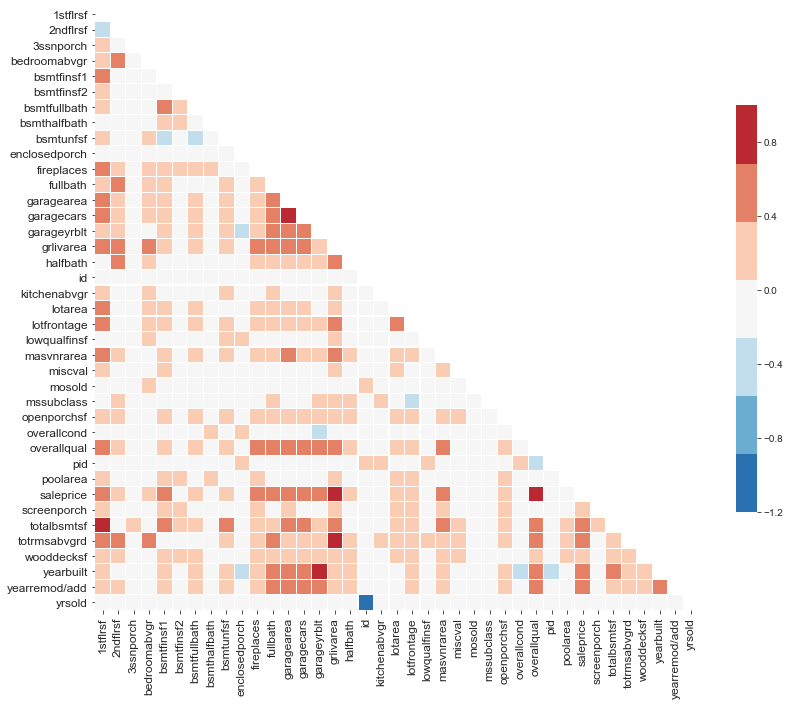

In [21]:
train = train[train.columns.sort_values()]

# plot heatmap
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.corr(),
            mask = mask,
            square=True,
            vmin = -1.2,
            vmax = 1,
            linewidth=0.1,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7))
ax.tick_params(labelsize=12)
plt.tight_layout()

In [22]:
# looking at variables that are strongly related to price
np.abs(train.corr())[['saleprice']].sort_values('saleprice', ascending=False)

,saleprice
saleprice,1.000000
overallqual,0.800207
grlivarea,0.697038
garagearea,0.650270
garagecars,0.648220
totalbsmtsf,0.628925
1stflrsf,0.618486
yearbuilt,0.571849
yearremod/add,0.550370
fullbath,0.537969


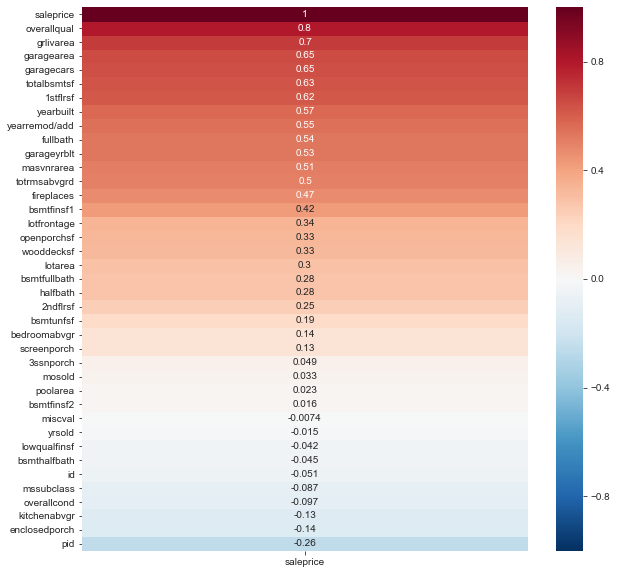

In [23]:
# features with highest postive relationships with sale price
# garage area and garage car are highly correlated but they are also correlated to each other
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice'),
            vmax=1, vmin=-1, cmap='RdBu_r',annot=True, ax=ax);
ax.invert_yaxis()

**Overall Quality**

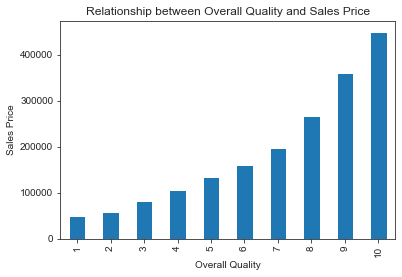

In [24]:
# overall quality seems to have a high correlation, visualize relationship with sales price using histogram
# rise in sales price along with rice in the overall quality

train.groupby('overallqual')['saleprice'].median().plot.bar()
plt.xlabel('Overall Quality')
plt.ylabel('Sales Price')
plt.title('Relationship between Overall Quality and Sales Price')
plt.show()


Text(0, 0.5, 'Sale price')

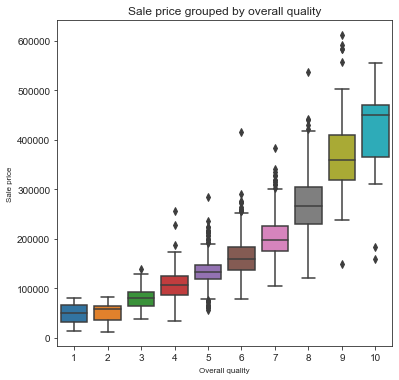

In [25]:
# box plots also show some form of relationship with overall quality and sale price
plt.figure(figsize=(6,6))
sns.boxplot(x='overallqual', y='saleprice', data=train)
plt.title('Sale price grouped by overall quality', fontsize=12)
plt.xlabel('Overall quality', fontsize=8)
plt.ylabel('Sale price', fontsize=8)


### Scatter plots of Continuous Variables

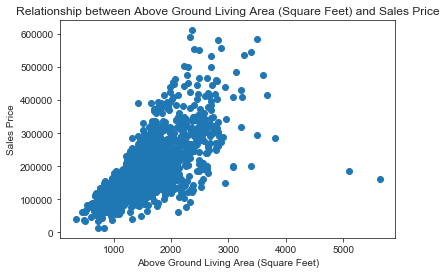

In [26]:
# garage living area also seems to have strong correlation with sales price
# there are also some outliers which will be removed during feature engineering
plt.scatter(train['grlivarea'],train['saleprice'])
plt.xlabel('Above Ground Living Area (Square Feet)')
plt.ylabel('Sales Price')
plt.title('Relationship between Above Ground Living Area (Square Feet) and Sales Price')
plt.show()

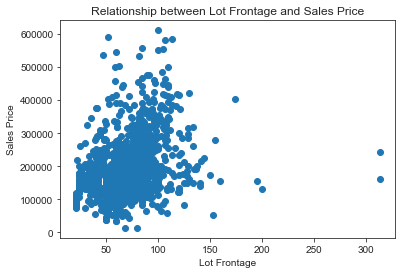

In [27]:
# few outliers that will be dealt with during the feature engineering process
plt.scatter(train['lotfrontage'],train['saleprice'])
plt.xlabel('Lot Frontage')
plt.ylabel('Sales Price')
plt.title('Relationship between Lot Frontage and Sales Price')
plt.show()

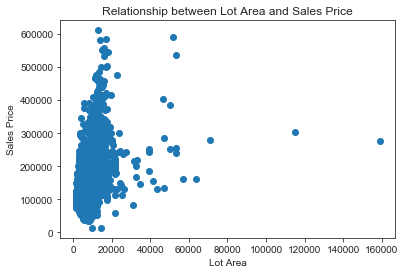

In [28]:
# few outliers that will be dealt with during the feature engineering process
plt.scatter(train['lotarea'],train['saleprice'])
plt.xlabel('Lot Area')
plt.ylabel('Sales Price')
plt.title('Relationship between Lot Area and Sales Price')
plt.show()

### Plotting relationship of Categorical variables with Sales price

Some of the features are ordinal in nature. There are some features that show some form of pattern.

In [29]:
categorical_columns

['mszoning',
 'street',
 'alley',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'poolqc',
 'fence',
 'miscfeature',
 'saletype']

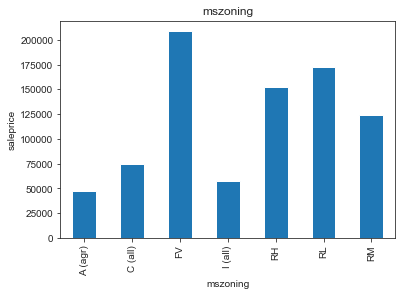

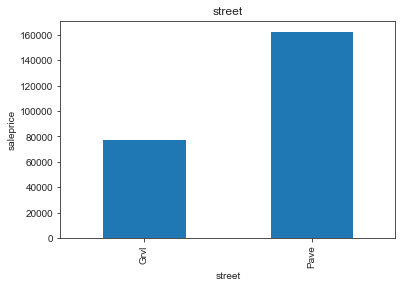

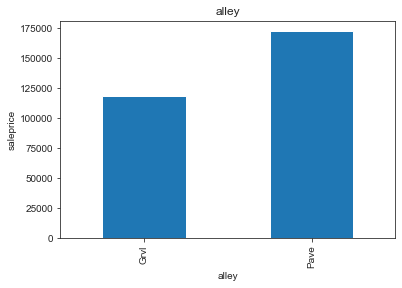

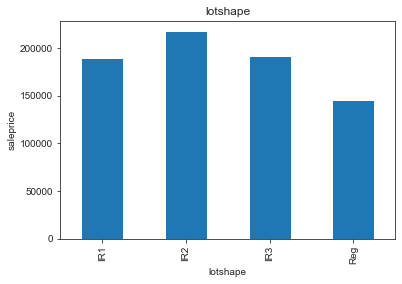

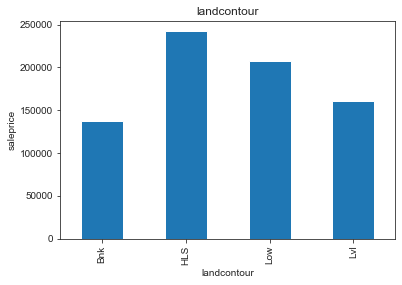

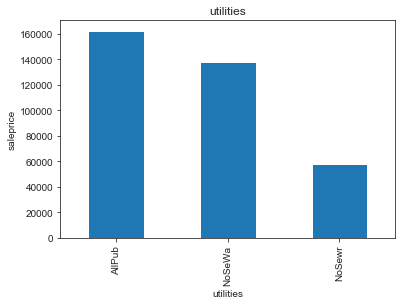

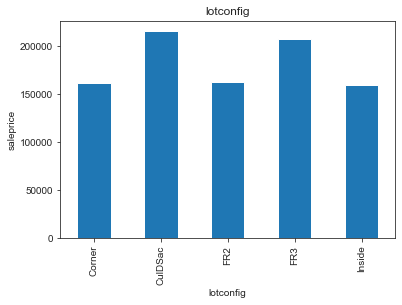

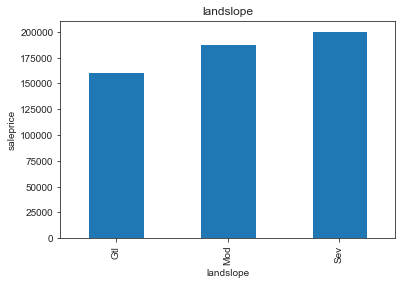

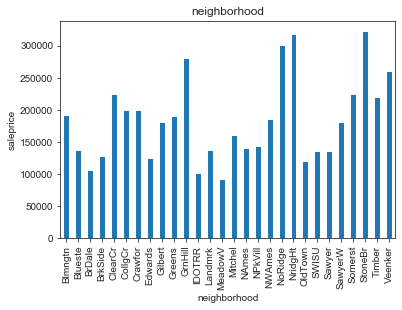

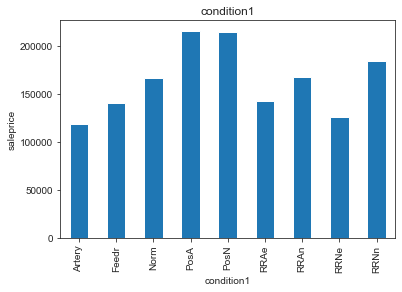

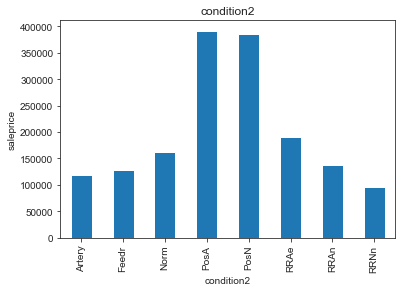

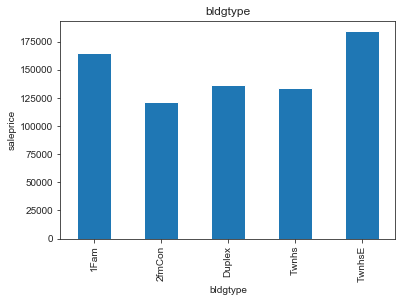

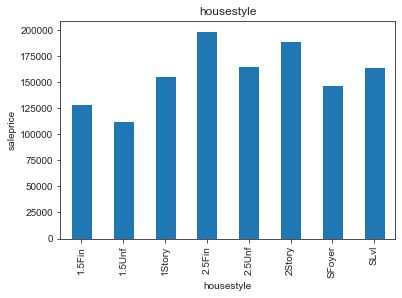

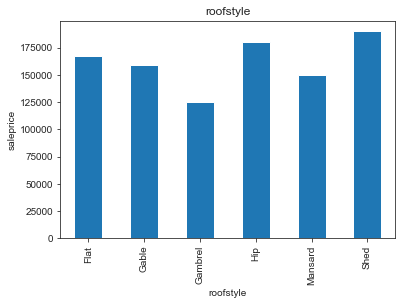

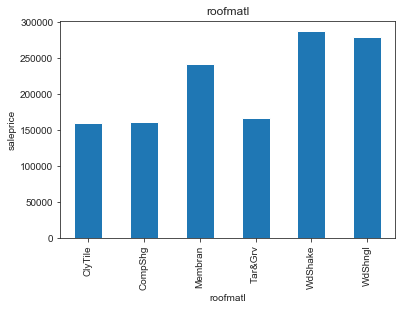

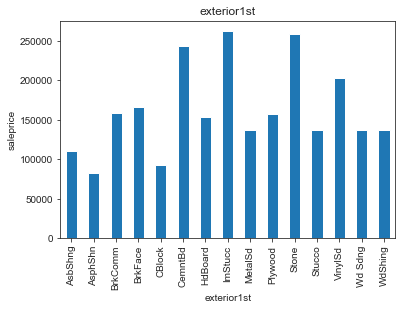

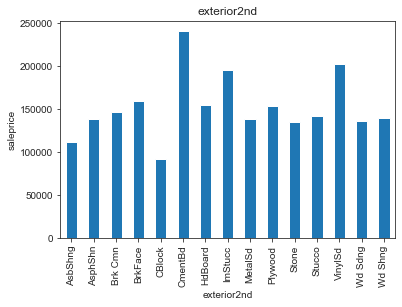

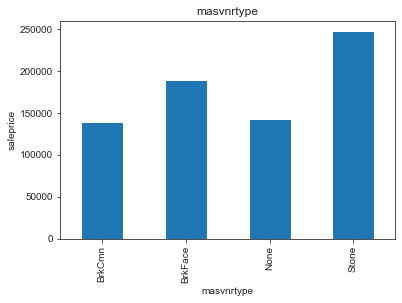

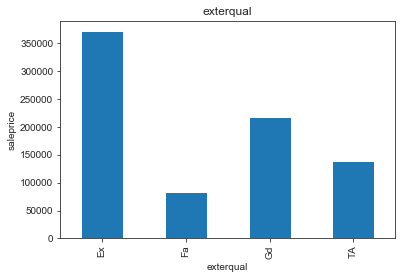

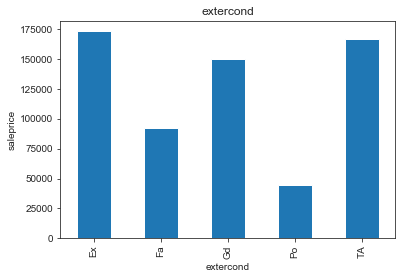

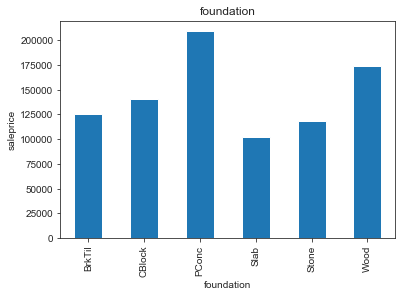

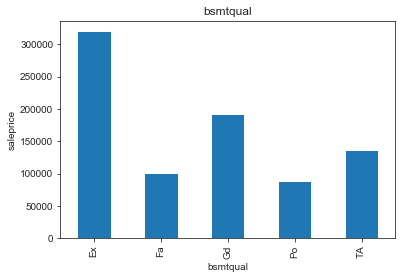

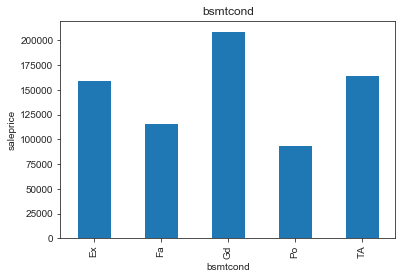

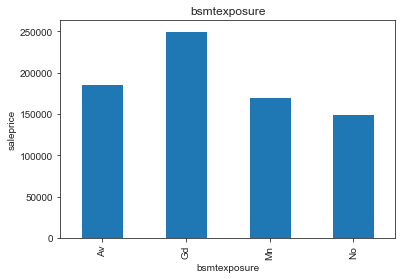

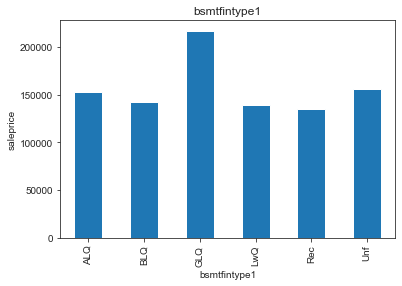

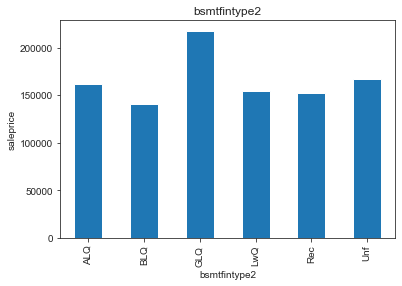

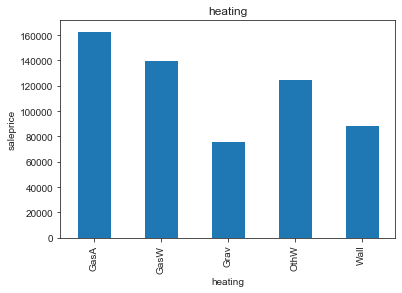

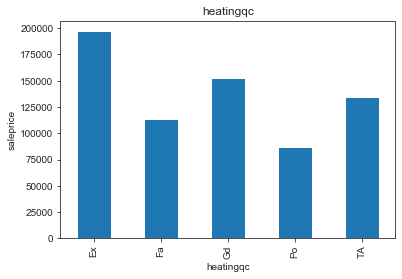

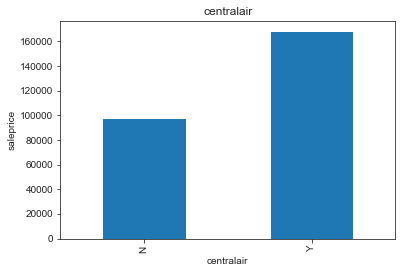

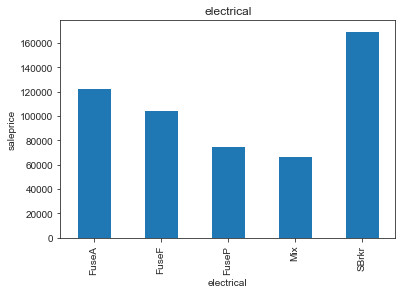

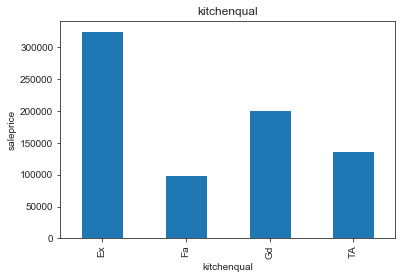

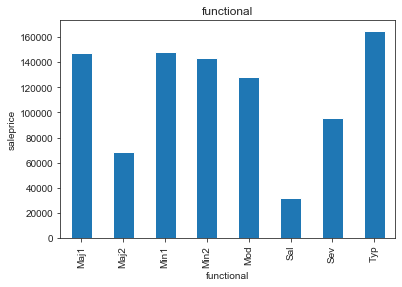

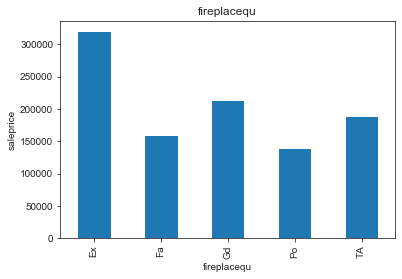

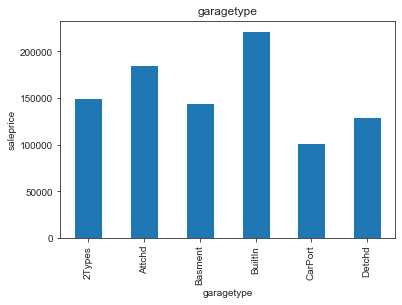

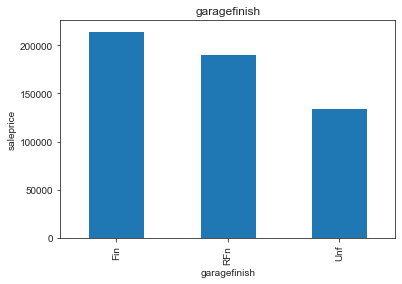

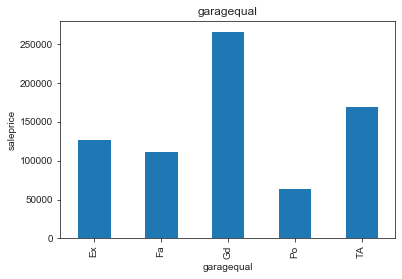

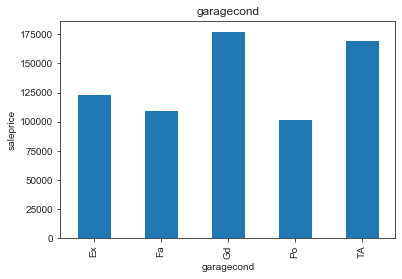

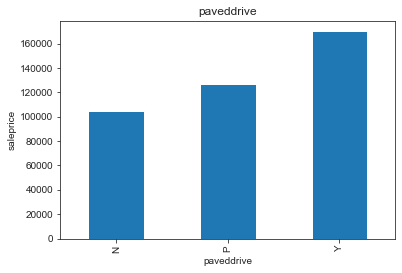

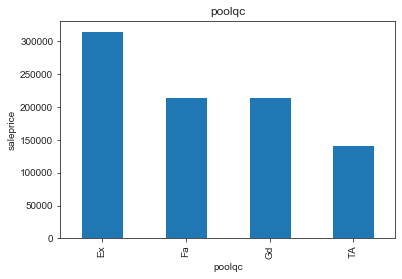

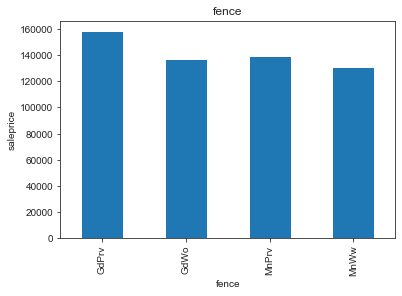

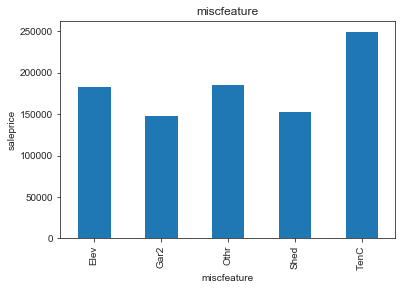

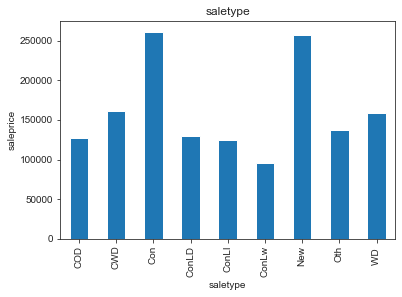

In [30]:
# some of the features are actually ordinal in nature and could be mapped into an order

for column in categorical_columns:
    
    train.groupby(column)['saleprice'].median().plot.bar()
    plt.xlabel(column)
    plt.ylabel('saleprice')
    plt.title(column)
    plt.show()


## Feature Engineering

#### One hot encoding of categorical columns without null values

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
1stflrsf         2051 non-null int64
2ndflrsf         2051 non-null int64
3ssnporch        2051 non-null int64
alley            140 non-null object
bedroomabvgr     2051 non-null int64
bldgtype         2051 non-null object
bsmtcond         1996 non-null object
bsmtexposure     1993 non-null object
bsmtfinsf1       2050 non-null float64
bsmtfinsf2       2050 non-null float64
bsmtfintype1     1996 non-null object
bsmtfintype2     1995 non-null object
bsmtfullbath     2049 non-null float64
bsmthalfbath     2049 non-null float64
bsmtqual         1996 non-null object
bsmtunfsf        2050 non-null float64
centralair       2051 non-null object
condition1       2051 non-null object
condition2       2051 non-null object
electrical       2051 non-null object
enclosedporch    2051 non-null int64
extercond        2051 non-null object
exterior1st      2051 non-null object
exterior2nd      205

In [32]:


# creating new column as will be using later, location plays a huge role
# will be using later for the lot frontage handling

train['neighborhood_dummies'] = train['neighborhood']


In [33]:
# one hot encode all categorical columns without null values
train = pd.get_dummies(train, columns=['mssubclass',
                                     'mszoning',
                                     'street',
                                     'landcontour',
                                     'condition1',
                                     'condition2',
                                     'housestyle',
                                     'lotconfig',
                                     'bldgtype',
                                     'neighborhood_dummies',
                                     'roofstyle',
                                     'roofmatl',
                                     'exterior1st',
                                     'exterior2nd', 
                                     'foundation', 
                                     'heating', 
                                     'centralair',
                                     'saletype'], 
                      drop_first=True)

In [34]:
train.shape

(2051, 202)

#### Dealing with continuous variables

In [35]:
train[train['bsmtfinsf1'].isnull()==True]

,1stflrsf,2ndflrsf,3ssnporch,alley,bedroomabvgr,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,bsmthalfbath,bsmtqual,bsmtunfsf,electrical,enclosedporch,extercond,exterqual,fence,fireplacequ,fireplaces,fullbath,functional,garagearea,garagecars,garagecond,garagefinish,garagequal,garagetype,garageyrblt,grlivarea,halfbath,heatingqc,id,kitchenabvgr,kitchenqual,landslope,lotarea,lotfrontage,lotshape,lowqualfinsf,masvnrarea,masvnrtype,miscfeature,miscval,mosold,neighborhood,openporchsf,overallcond,overallqual,paveddrive,pid,poolarea,poolqc,saleprice,screenporch,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremod/add,yrsold,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,neighborhood_dummies_Blueste,neighborhood_dummies_BrDale,neighborhood_dummies_BrkSide,neighborhood_dummies_ClearCr,neighborhood_dummies_CollgCr,neighborhood_dummies_Crawfor,neighborhood_dummies_Edwards,neighborhood_dummies_Gilbert,neighborhood_dummies_Greens,neighborhood_dummies_GrnHill,neighborhood_dummies_IDOTRR,neighborhood_dummies_Landmrk,neighborhood_dummies_MeadowV,neighborhood_dummies_Mitchel,neighborhood_dummies_NAmes,neighborhood_dummies_NPkVill,neighborhood_dummies_NWAmes,neighborhood_dummies_NoRidge,neighborhood_dummies_NridgHt,neighborhood_dummies_OldTown,neighborhood_dummies_SWISU,neighborhood_dummies_Sawyer,neighborhood_dummies_SawyerW,neighborhood_dummies_Somerst,neighborhood_dummies_StoneBr,neighborhood_dummies_Timber,neighborhood_dummies_Veenker,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
1327,896,0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FuseA,0,TA,TA,MnPrv,NaN,0,1,Typ,280.0,1.0,TA,Unf,TA,Detchd,1946.0,896,0,TA,1342,1,TA,Gtl,5940,99.0,IR1,0,0.0,None,NaN,0,4,BrkSide,0,7,4,Y,903230120,0,NaN,79000,0,NaN,4,AllPub,0,1946,1950,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [36]:
# remove the row with a null value in bsmtfin1
for i in train[train['bsmtfinsf1'].isnull()==True].loc[:,'id']:
    train = train[train['id']!=i]

In [37]:
train[train['garagearea'].isnull()==True]

,1stflrsf,2ndflrsf,3ssnporch,alley,bedroomabvgr,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,bsmthalfbath,bsmtqual,bsmtunfsf,electrical,enclosedporch,extercond,exterqual,fence,fireplacequ,fireplaces,fullbath,functional,garagearea,garagecars,garagecond,garagefinish,garagequal,garagetype,garageyrblt,grlivarea,halfbath,heatingqc,id,kitchenabvgr,kitchenqual,landslope,lotarea,lotfrontage,lotshape,lowqualfinsf,masvnrarea,masvnrtype,miscfeature,miscval,mosold,neighborhood,openporchsf,overallcond,overallqual,paveddrive,pid,poolarea,poolqc,saleprice,screenporch,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremod/add,yrsold,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,neighborhood_dummies_Blueste,neighborhood_dummies_BrDale,neighborhood_dummies_BrkSide,neighborhood_dummies_ClearCr,neighborhood_dummies_CollgCr,neighborhood_dummies_Crawfor,neighborhood_dummies_Edwards,neighborhood_dummies_Gilbert,neighborhood_dummies_Greens,neighborhood_dummies_GrnHill,neighborhood_dummies_IDOTRR,neighborhood_dummies_Landmrk,neighborhood_dummies_MeadowV,neighborhood_dummies_Mitchel,neighborhood_dummies_NAmes,neighborhood_dummies_NPkVill,neighborhood_dummies_NWAmes,neighborhood_dummies_NoRidge,neighborhood_dummies_NridgHt,neighborhood_dummies_OldTown,neighborhood_dummies_SWISU,neighborhood_dummies_Sawyer,neighborhood_dummies_SawyerW,neighborhood_dummies_Somerst,neighborhood_dummies_StoneBr,neighborhood_dummies_Timber,neighborhood_dummies_Veenker,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
1712,942,886,0,NaN,3,TA,No,548.0,0.0,ALQ,Unf,0.0,0.0,Gd,311.0,SBrkr,212,TA,TA,MnPrv,NaN,0,2,Typ,NaN,NaN,NaN,NaN,NaN,Detchd,NaN,1828,0,Ex,2237,1,Gd,Gtl,9060,50.0,Reg,0,0.0,None,NaN,0,3,IDOTRR,0,6,5,Y,910201180,0,NaN,150909,0,859.0,6,AllPub,174,1923,1999,2007,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [38]:
# remove the row with a null value in bsmtfin1
for i in train[train['garagearea'].isnull()==True].loc[:,'id']:
    train = train[train['id']!=i]

#### Dealing with discrete variables

In [39]:
train[train['bsmtfullbath'].isnull()==True]

,1stflrsf,2ndflrsf,3ssnporch,alley,bedroomabvgr,bsmtcond,bsmtexposure,bsmtfinsf1,bsmtfinsf2,bsmtfintype1,bsmtfintype2,bsmtfullbath,bsmthalfbath,bsmtqual,bsmtunfsf,electrical,enclosedporch,extercond,exterqual,fence,fireplacequ,fireplaces,fullbath,functional,garagearea,garagecars,garagecond,garagefinish,garagequal,garagetype,garageyrblt,grlivarea,halfbath,heatingqc,id,kitchenabvgr,kitchenqual,landslope,lotarea,lotfrontage,lotshape,lowqualfinsf,masvnrarea,masvnrtype,miscfeature,miscval,mosold,neighborhood,openporchsf,overallcond,overallqual,paveddrive,pid,poolarea,poolqc,saleprice,screenporch,totalbsmtsf,totrmsabvgrd,utilities,wooddecksf,yearbuilt,yearremod/add,yrsold,mssubclass_30,mssubclass_40,mssubclass_45,mssubclass_50,mssubclass_60,mssubclass_70,mssubclass_75,mssubclass_80,mssubclass_85,mssubclass_90,mssubclass_120,mssubclass_150,mssubclass_160,mssubclass_180,mssubclass_190,mszoning_C (all),mszoning_FV,mszoning_I (all),mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,landcontour_HLS,landcontour_Low,landcontour_Lvl,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,neighborhood_dummies_Blueste,neighborhood_dummies_BrDale,neighborhood_dummies_BrkSide,neighborhood_dummies_ClearCr,neighborhood_dummies_CollgCr,neighborhood_dummies_Crawfor,neighborhood_dummies_Edwards,neighborhood_dummies_Gilbert,neighborhood_dummies_Greens,neighborhood_dummies_GrnHill,neighborhood_dummies_IDOTRR,neighborhood_dummies_Landmrk,neighborhood_dummies_MeadowV,neighborhood_dummies_Mitchel,neighborhood_dummies_NAmes,neighborhood_dummies_NPkVill,neighborhood_dummies_NWAmes,neighborhood_dummies_NoRidge,neighborhood_dummies_NridgHt,neighborhood_dummies_OldTown,neighborhood_dummies_SWISU,neighborhood_dummies_Sawyer,neighborhood_dummies_SawyerW,neighborhood_dummies_Somerst,neighborhood_dummies_StoneBr,neighborhood_dummies_Timber,neighborhood_dummies_Veenker,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,centralair_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
616,3820,0,0,NaN,5,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,SBrkr,0,TA,TA,NaN,Gd,2,3,Typ,624.0,2.0,TA,Unf,TA,Attchd,1959.0,3820,1,TA,1498,1,Ex,Gtl,47007,123.0,IR1,0,0.0,None,NaN,0,7,Edwards,372,7,5,Y,908154080,0,NaN,284700,0,0.0,11,AllPub,0,1959,1996,2008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [40]:
# remove row with the null value
for i in train[train['bsmtfullbath'].isnull()==True].loc[:,'id']:
    train = train[train['id']!=i]

In [41]:
# attempting to get dummies for month sold
train = pd.get_dummies(train, columns=['mosold'], drop_first=True)

#### Dealing with ordinal variables

In [42]:
# assign numeric values according to irregularity (0,1,2,3)
train['lotshape'] = train['lotshape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})

In [43]:
# extremely high over representation of AllPub but will be dealt it if the need arises
# for now, just assign numerical values
print(train['utilities'].value_counts())
train['utilities'] = train['utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})

AllPub    2046
NoSewr       1
NoSeWa       1
Name: utilities, dtype: int64


In [44]:
# these variables follow the same scale
def map_new_vals(colname,dictionary):
    train[colname] = train[colname].map(dictionary)
    
    
qual_dict = {'Ex': 5,
               'Gd': 4,
               'TA': 3,
               'Fa': 2,
               'Po': 1,
               'None': 0}
    

map_new_vals('exterqual', dictionary = qual_dict)
map_new_vals('extercond', dictionary = qual_dict)
map_new_vals('heatingqc', dictionary = qual_dict)
map_new_vals('kitchenqual', dictionary = qual_dict)

In [45]:
train['landslope'] = train['landslope'].map({'Gtl':0,'Mod':1,'Sev':2})

In [46]:
train['electrical'] = train['electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})

In [47]:
train['functional'] = train['functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})

In [48]:
train['paveddrive'] = train['paveddrive'].map({'N':0,'P':1,'Y':2})


#### Garage Data

In [49]:
null_garage_data = train[train['garagefinish'].isnull()==True]
null_garage_data[['garagearea','garagetype','garageyrblt','garagefinish','garagecars','garagequal','garagecond']].head(5)

,garagearea,garagetype,garageyrblt,garagefinish,garagecars,garagequal,garagecond
28,0.0,NaN,NaN,NaN,0.0,NaN,NaN
53,0.0,NaN,NaN,NaN,0.0,NaN,NaN
65,0.0,NaN,NaN,NaN,0.0,NaN,NaN
79,0.0,NaN,NaN,NaN,0.0,NaN,NaN
101,0.0,NaN,NaN,NaN,0.0,NaN,NaN


In [50]:
train['garagetype'] = train['garagetype'].fillna('None')
train['garagefinish'] = train['garagefinish'].fillna('None')
train['garagequal'] = train['garagequal'].fillna('None')
train['garagecond'] = train['garagecond'].fillna('None')

# get the dummies for garage type
train = pd.get_dummies(train, columns=['garagetype'], drop_first=True)

# map order from earlier defined function
map_new_vals('garagequal', dictionary = qual_dict)
map_new_vals('garagecond', dictionary = qual_dict)

# fill the year of garage built with the year it was built, they tend to have similar values
train['garageyrblt'] = train['garageyrblt'].fillna(train['yearbuilt'])



#### Basement Data

In [51]:
null_bsmt_data = train[train['bsmtexposure'].isnull()==True]
null_bsmt_data[['bsmtexposure','bsmtqual','bsmtcond','bsmtfintype1','bsmtfintype2','bsmtfinsf1']].head(5)

,bsmtexposure,bsmtqual,bsmtcond,bsmtfintype1,bsmtfintype2,bsmtfinsf1
12,NaN,NaN,NaN,NaN,NaN,0.0
93,NaN,NaN,NaN,NaN,NaN,0.0
114,NaN,NaN,NaN,NaN,NaN,0.0
146,NaN,NaN,NaN,NaN,NaN,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0


In [52]:
for i in ['bsmtexposure','bsmtqual','bsmtcond','bsmtfintype1','bsmtfintype2']:
    train[i] = train[i].fillna('None')


map_new_vals('bsmtqual', dictionary = qual_dict)
map_new_vals('bsmtcond', dictionary = qual_dict)


bsmtfintype_dict = {'GLQ': 6,
               'ALQ': 5,
               'BLQ': 4,
               'Rec': 3,
               'LwQ': 2,
               'Unf' : 1,    
               'None': 0}

map_new_vals('bsmtfintype1', dictionary = bsmtfintype_dict)
map_new_vals('bsmtfintype2', dictionary = bsmtfintype_dict)

bsmtex_dict = {'None': 0,
                'No': 1,
                'Mn': 2,
                'Av': 3,
                'Gd': 4}

map_new_vals('bsmtexposure', dictionary = bsmtex_dict)




#### Mason Veneer and Alley

In [53]:

#Convert existing Alley column into a dummy for Yes/No on Alley, and dummies for gravel alley and paved alley
train['alley'] = train['alley'].fillna(0)
train['alleygrvl'] = train['alley'].map(lambda x: 1 if x=='grvl' else 0)
train['alleypave'] = train['alley'].map(lambda x: 1 if x=='pave' else 0)
train['alley'] = train['alley'].map(lambda x: 1 if x!=0 else 0)

#Miscellaneous dummy creation/imputation for nominal variables:
train = pd.get_dummies(train, columns=['miscfeature'])

train['masvnrtype'] = train['masvnrtype'].fillna('None')
train = pd.get_dummies(train, columns=['masvnrtype'])
train.drop('masvnrtype_None',axis=1,inplace=True)

train['masvnrarea'] = train['masvnrarea'].fillna(0)

#### Fireplaces, Pools, Fences

In [54]:
train['fireplacequ'] = train['fireplacequ'].fillna('None')
map_new_vals('fireplacequ', dictionary = qual_dict)

train['poolqc'] = train['poolqc'].fillna('None')
map_new_vals('poolqc', dictionary = qual_dict)

train['fence'] = train['fence'].fillna('None')
train['fence'] = train['fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

#### Lot Frontage

In [55]:
# neighborhood and lot frontage could, in essence, be linked somehow
# this strategy in filling up so many null values for lot frontage would be to take mean lot frontage according
# to the neighbourhood of every house
# basically do a groupby

neighborhood_means = train.groupby('neighborhood')['lotfrontage'].mean()


In [56]:
neighborhood_means = neighborhood_means.fillna(np.mean(neighborhood_means))

In [57]:
train['lotfrontage'] = train['lotfrontage'].fillna(train['neighborhood'])

In [58]:
train['lotfrontage'] = train['lotfrontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)


In [59]:
# neighborhood no longer needed
train.drop('neighborhood',axis=1,inplace=True)

#### Rechecking

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Columns: 224 entries, 1stflrsf to masvnrtype_Stone
dtypes: float64(12), int64(48), object(1), uint8(163)
memory usage: 1.3+ MB


In [61]:
train.shape

(2048, 224)

In [62]:
# features that do not have any predictive value
train.drop(['mssubclass_150',
           'mszoning_C (all)',
           'condition2_Feedr',
           'condition2_RRAe',
           'condition2_RRAn',
           'condition2_RRNn',
           'neighborhood_dummies_GrnHill',   
           'neighborhood_dummies_Landmrk',
           'exterior1st_CBlock',
           'exterior1st_ImStucc',
           'exterior1st_Stone',
           'exterior2nd_Stone',
           'heating_Wall',
           'miscfeature_TenC',
           'miscfeature_Elev',
           'roofmatl_CompShg',
           'roofmatl_Membran'],
           axis=1,inplace=True)

In [63]:
train.shape

(2048, 207)

In [64]:
test.shape

(879, 80)

### Test Clean

In [65]:
test['neighborhood_dummies'] = test['neighborhood']
test = pd.get_dummies(test, columns=['mssubclass',
                                     'mszoning',
                                     'street',
                                     'landcontour',
                                     'condition1',
                                     'condition2',
                                     'housestyle',
                                     'lotconfig',
                                     'bldgtype',
                                     'neighborhood_dummies',
                                     'roofstyle',
                                     'roofmatl',
                                     'exterior1st',
                                     'exterior2nd', 
                                     'foundation', 
                                     'heating', 
                                     'centralair',
                                     'saletype'], 
                      drop_first=True)

In [66]:
for i in test[test['bsmtfinsf1'].isnull()==True].loc[:,'id']:
    test = test[test['id']!=i]

In [67]:
for i in test[test['garagearea'].isnull()==True].loc[:,'id']:
    train = test[test['id']!=i]

In [68]:
for i in test[test['bsmtfullbath'].isnull()==True].loc[:,'id']:
    test = test[test['id']!=i]

In [69]:
test = pd.get_dummies(test, columns=['mosold'], drop_first=True)

In [70]:
test['lotshape'] = test['lotshape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
test['utilities'] = test['utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})

def map_new_vals(colname,dictionary):
    test[colname] = test[colname].map(dictionary)
    
    
qual_dict = {'Ex': 5,
               'Gd': 4,
               'TA': 3,
               'Fa': 2,
               'Po': 1,
               'None': 0}
    

map_new_vals('exterqual', dictionary = qual_dict)
map_new_vals('extercond', dictionary = qual_dict)
map_new_vals('heatingqc', dictionary = qual_dict)
map_new_vals('kitchenqual', dictionary = qual_dict)

In [71]:
test['landslope'] = test['landslope'].map({'Gtl':0,'Mod':1,'Sev':2})
test['electrical'] = test['electrical'].map({'SBrkr':0,'FuseA':1,'FuseF':2, 'FuseP':3, 'Mix':1.5})
test['functional'] = test['functional'].map({'Typ':0,'Min1':1,'Min2':2,'Mod':3,'Maj1':4,'Maj2':5,'Sev':6,'Sal':7})
test['paveddrive'] = test['paveddrive'].map({'N':0,'P':1,'Y':2})

In [72]:
test['garagetype'] = test['garagetype'].fillna('None')
test['garagefinish'] = test['garagefinish'].fillna('None')
test['garagequal'] = test['garagequal'].fillna('None')
test['garagecond'] = test['garagecond'].fillna('None')

# get the dummies for garage type
test = pd.get_dummies(test, columns=['garagetype'], drop_first=True)

# map order from earlier defined function
map_new_vals('garagequal', dictionary = qual_dict)
map_new_vals('garagecond', dictionary = qual_dict)

# fill the year of garage built with the year it was built, they tend to have similar values
test['garageyrblt'] = test['garageyrblt'].fillna(test['yearbuilt'])



In [73]:
for i in ['bsmtexposure','bsmtqual','bsmtcond','bsmtfintype1','bsmtfintype2']:
    test[i] = test[i].fillna('None')


map_new_vals('bsmtqual', dictionary = qual_dict)
map_new_vals('bsmtcond', dictionary = qual_dict)


bsmtfintype_dict = {'GLQ': 6,
               'ALQ': 5,
               'BLQ': 4,
               'Rec': 3,
               'LwQ': 2,
               'Unf' : 1,    
               'None': 0}

map_new_vals('bsmtfintype1', dictionary = bsmtfintype_dict)
map_new_vals('bsmtfintype2', dictionary = bsmtfintype_dict)

bsmtex_dict = {'None': 0,
                'No': 1,
                'Mn': 2,
                'Av': 3,
                'Gd': 4}

map_new_vals('bsmtexposure', dictionary = bsmtex_dict)


In [74]:
#Convert existing Alley column into a dummy for Yes/No on Alley, and dummies for gravel alley and paved alley
test['alley'] = test['alley'].fillna(0)
test['alleygrvl'] = test['alley'].map(lambda x: 1 if x=='grvl' else 0)
test['alleypave'] = test['alley'].map(lambda x: 1 if x=='pave' else 0)
test['alley'] = test['alley'].map(lambda x: 1 if x!=0 else 0)

#Miscellaneous dummy creation/imputation for nominal variables:
test = pd.get_dummies(test, columns=['miscfeature'])

test['masvnrtype'] = test['masvnrtype'].fillna('None')
test = pd.get_dummies(test, columns=['masvnrtype'])
test.drop('masvnrtype_None',axis=1,inplace=True)

test['masvnrarea'] = test['masvnrarea'].fillna(0)

In [75]:
test['fireplacequ'] = test['fireplacequ'].fillna('None')
map_new_vals('fireplacequ', dictionary = qual_dict)

test['poolqc'] = test['poolqc'].fillna('None')
map_new_vals('poolqc', dictionary = qual_dict)

test['fence'] = test['fence'].fillna('None')
test['fence'] = test['fence'].map({'GdPrv':3,'GdWo':2,'MnPrv':1,'MnWw':1,'None':0})

In [76]:
neighborhood_ave = test.groupby('neighborhood')['lotfrontage'].mean()
neighborhood_ave = neighborhood_ave.fillna(np.mean(neighborhood_ave))
test['lotfrontage'] = test['lotfrontage'].fillna(test['neighborhood'])
test['lotfrontage'] = test['lotfrontage'].map(lambda x: neighborhood_means[x] if type(x)==str else x)
# neighborhood no longer needed
test.drop('neighborhood',axis=1,inplace=True)


In [83]:
test.isnull().sum()

id                    0
pid                   0
lotfrontage           0
lotarea               0
alley                 0
lotshape              0
utilities             0
landslope             0
overallqual           0
overallcond           0
yearbuilt             0
yearremod/add         0
masvnrarea            0
exterqual             0
extercond             0
bsmtqual              0
bsmtcond              0
bsmtexposure          0
bsmtfintype1          0
bsmtfinsf1            0
bsmtfintype2          0
bsmtfinsf2            0
bsmtunfsf             0
totalbsmtsf           0
heatingqc             0
electrical            1
1stflrsf              0
2ndflrsf              0
lowqualfinsf          0
grlivarea             0
                     ..
saletype_Oth          0
saletype_VWD          0
saletype_WD           0
mosold_2              0
mosold_3              0
mosold_4              0
mosold_5              0
mosold_6              0
mosold_7              0
mosold_8              0
mosold_9        

In [88]:
test['electrical'] = test['electrical'].fillna(0)

In [ ]:
test.isnull().sum().sum()

#### Save changes for train and test data

In [91]:
train.to_csv('../datasets/train_cleaned.csv')

In [92]:
test.to_csv('../datasets/test_cleaned.csv')

**Conclusion**

The above EDA revealed several issues with the data, such as the presence of null values and columns with skewed distributions. These features were cleaned and preprocessed. Plotting several scatter plots, histograms, heatmaps allowed a better understanding of the data at hand before being able to model the data.